In [1]:
import pandas as pd

In [2]:
!wget -O ChurnData.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv

--2019-01-05 08:41:57--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/ChurnData.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36144 (35K) [text/csv]
Saving to: ‘ChurnData.csv’

ChurnData.csv       100%[===================>]  35.30K  61.6KB/s    in 0.6s    

2019-01-05 08:42:00 (61.6 KB/s) - ‘ChurnData.csv’ saved [36144/36144]



In [4]:
df = pd.read_csv('ChurnData.csv')

In [5]:
df.head()

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0


In [6]:
df.columns

Index(['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless', 'longmon', 'tollmon', 'equipmon', 'cardmon',
       'wiremon', 'longten', 'tollten', 'cardten', 'voice', 'pager',
       'internet', 'callwait', 'confer', 'ebill', 'loglong', 'logtoll',
       'lninc', 'custcat', 'churn'],
      dtype='object')

In [7]:
df2 = df[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless','churn']]

In [8]:
X = df2[['tenure', 'age', 'address', 'income', 'ed', 'employ', 'equip',
       'callcard', 'wireless']].values

In [9]:
Y = df2[['churn']].values

In [10]:
Y[0:5]

array([[1.],
       [1.],
       [0.],
       [0.],
       [0.]])

In [15]:
Y = Y.astype(int)

In [16]:
Y[0:5]

array([[1],
       [1],
       [0],
       [0],
       [0]])

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
from sklearn import preprocessing

In [19]:
x = preprocessing.StandardScaler().fit(X).transform(X)

In [20]:
x[0:5]

array([[-1.13518441, -0.62595491, -0.4588971 ,  0.4751423 ,  1.6961288 ,
        -0.58477841, -0.85972695,  0.64686916,  1.56469673],
       [-0.11604313, -0.62595491,  0.03454064, -0.32886061, -0.6433592 ,
        -1.14437497, -0.85972695, -1.54590766, -0.63910148],
       [-0.57928917, -0.85594447, -0.261522  , -0.35227817, -1.42318853,
        -0.92053635, -0.85972695, -1.54590766, -0.63910148],
       [ 0.11557989, -0.47262854, -0.65627219,  0.00679109, -0.6433592 ,
        -0.02518185,  1.16316   ,  0.64686916,  1.56469673],
       [-1.32048283, -0.47262854,  0.23191574,  0.03801451, -0.6433592 ,
         0.53441472, -0.85972695,  0.64686916, -0.63910148]])

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
train_x,test_x,train_y,test_y = train_test_split(x,Y,test_size = 0.2)

In [23]:
lr = LogisticRegression(C = 0.01,solver = 'liblinear')

In [24]:
lr.fit(train_x,train_y)

/home/user/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [25]:
pred = lr.predict(test_x)

In [26]:
prob = lr.predict_proba(test_x)

In [29]:
pd.DataFrame({'A':list(test_y),'P':list(pred),'Prob':list(prob)})

,A,P,Prob
0,[1],1,"[0.45187335125704586, 0.5481266487429541]"
1,[0],0,"[0.627474577632907, 0.37252542236709296]"
2,[1],1,"[0.3647826575799318, 0.6352173424200682]"
3,[0],0,"[0.694414862186248, 0.3055851378137519]"
4,[1],1,"[0.4313705375945972, 0.5686294624054028]"
5,[1],1,"[0.4768166821139953, 0.5231833178860047]"
6,[0],0,"[0.6638136399024452, 0.3361863600975547]"
7,[0],0,"[0.5745488529352016, 0.4254511470647984]"
8,[0],1,"[0.4535266220432477, 0.5464733779567523]"
9,[0],0,"[0.6472244828990575, 0.35277551710094246]"


In [30]:
from sklearn.metrics import jaccard_similarity_score

In [31]:
jaccard_similarity_score(test_y,pred)

0.8

In [32]:
from sklearn.metrics import confusion_matrix

In [33]:
cm = confusion_matrix(test_y,pred)

In [34]:
cm

array([[21,  6],
       [ 2, 11]])

In [35]:
import seaborn as sn

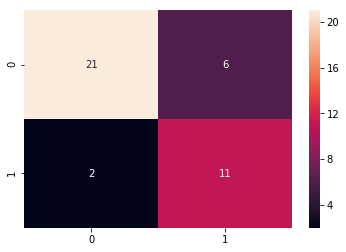

In [36]:
sn.heatmap(cm,annot = True)

In [37]:
import matplotlib.pyplot as plt

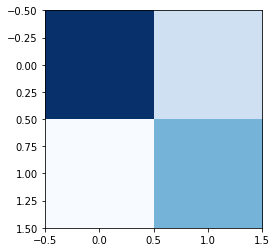

In [39]:
plt.imshow(cm,cmap = plt.cm.Blues)

In [40]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(test_y,pred))

             precision    recall  f1-score   support

          0       0.91      0.78      0.84        27
          1       0.65      0.85      0.73        13

avg / total       0.83      0.80      0.81        40



In [43]:
from sklearn.metrics import log_loss

In [46]:
log_loss(test_y,prob)

0.5598337512248188